# <span style="color:blue">Programação Python para Ciência de Dados</span>

## <span style="color:blue">Homework: Numpy parte II, Matplotlib, Pandas parte II</span>
---


In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <span style="color:blue">Numpy - Parte II e Matplotlib</span>

### 1)
- Crie um array bi-dimensional  do numpy denominado A com 6 linhas e 3 colunas apenas broadcasting o  array [1 2 3 4 5 6].<br>
- Crie arrays <font color='blue'>B</font> e <font color='blue'>C</font> onde <font color='blue'>B</font> é uma copia de <font color='blue'>A</font> e <font color='blue'>C</font> é uma view de <font color='blue'>A</font>, respectivamente. Use o método `copy()` e  `view()` do numpy junto do comando `id()` para ter certeza que <font color='blue'>B</font> e <font color='blue'>C</font> não se referem a mesma localização de <font color='blue'>A</font>. <br>
- Reshape <font color='blue'>C</font> para ter 9 linhas e 2 colunas. Crie uma nova variável <font color='blue'>D</font> copiando as linhas 3,6, e 8 de <font color='blue'>C</font>. 

In [7]:
# solução 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.arange(6).reshape(6,1)
b = np.ones(3).reshape(1,3)

print(a)
print(b)
print('-----')
A = a+b
print(A)
print('-----')

B = A.copy()
C = A.view()

print(B)

print(C)

print(id(A))
print(id(B))
print(id(C))
print('-----')

C = C.reshape(9,2)
print(C)
D = np.copy(C[[3,6,8]])
print('-----')
print(D)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
[[1. 1. 1.]]
-----
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]
-----
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]
 [6. 6. 6.]]
139668225884448
139668225885248
139668225845328
-----
[[1. 1.]
 [1. 2.]
 [2. 2.]
 [3. 3.]
 [3. 4.]
 [4. 4.]
 [5. 5.]
 [5. 6.]
 [6. 6.]]
-----
[[3. 3.]
 [5. 5.]
 [6. 6.]]


### 2) 
Considere uma matriz <font color='blue'>A</font>,  $n\times n,\, n\geq 2$ . Por exemplo, para $n=4$:
$$
A=\left(\begin{array}[cccc]\\
1 & 3 & 2 & 6 \\
3 & 5 & 1 & {7} \\
{0} & 4 & {2} & {6} \\
6 & 1 & 3 & {1} 
\end{array}\right)
$$
Crie uma matriz <font color='blue'>B</font>  2$\times$2 onde a primeira linha corresponde aos elementos mínimos e máximos to triângulo superior (elementos acima da diagonal) de <font color='blue'>A</font>, e a segunda linha corresponde aos elementos mínimos e máximos do triângulo inferior (elementos abaixo da diagonal) de <font color='blue'>A</font>. 

A diagonal principal deve ser considerara como pertencente tanto ao triângulo superior como inferior de <font color='blue'>A</font>. Por exemplo, dado <font color='blue'>A</font> como acima a solução seria: 
$$
B=\left(\begin{array}[cc]\\
1 & 7  \\
0 & 6  
\end{array}\right)
$$
A sua solução deve funcionar para qualquer matriz $n\times n,\, n\geq 2$.<br>


__Dica__: Use os métodos "triu_indices"  e "tril_indices" do Numpy, combinados com "max" e "min".

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
A = np.random.randint(low=7,high=69,size=(4,4))
print(A)

dig_sup = np.triu_indices(A.shape[0])
dig_inf = np.tril_indices(A.shape[0])

B = np.array([A[dig_sup].max(), A[dig_sup].min(), A[dig_inf].max(), A[dig_inf].min()]).reshape(2,2)
print(B)

[[22 30 33 27]
 [53 10 49 59]
 [10 32 35 66]
 [10 17 10 51]]
[[66 10]
 [53 10]]


### 3)   Regressão Linear
Dado um conjunto de pontos $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, podemos encaixar uma reta $y=\alpha_0+\alpha_1 x$ a esses pontos ao resolver o sistema linear na forma:

$$
A^\top A\alpha = A^\top b
$$

onde $A^\top$ é o transposto de A sendo:

$$
A=\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_n 
\end{array}\right),
\qquad
\alpha = \left(\begin{array}{c}
\alpha_0 \\
\alpha_1 
\end{array}\right),
\qquad
b = \left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array}\right)
$$

Suponha que os pontos $(x_i,y_i)$ são gerados pelo código:

```python
x = np.random.uniform(0,1,100)
y = 1.0-x+np.random.uniform(-0.3,0.3,100)
```

1.  Construa a matriz $A$
2.  Resolva o sistema linear $A^\top A\alpha = A^\top b$ utilizando  "numpy.linalg.solve" e imprima o resultado $\alpha_0$ e $\alpha_1$.


In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.uniform(0,1,100)
y = 1.0-x+np.random.uniform(-0.3,0.3,100)

A = np.ones(2*len(x)).reshape(len(x),2)
A[:,1] = x

a = np.linalg.solve(np.dot(A.T, A), np.dot(A.T,y))
print(a)

reta = a[0]+a[1]*x


[ 0.96788733 -0.98530809]


###  4)  
Utilizando o resultado da pergunta 3, plote os pontos (x_i,y_i)$ e a linha encontrada. O seu código deveria produzir uma figura parecida com a apresentada abaixo: 

![IMAGEM](linefit.png)

__PS.__ A imagem _linefit.png_ deve estar no mesmo diretório desse notebook.

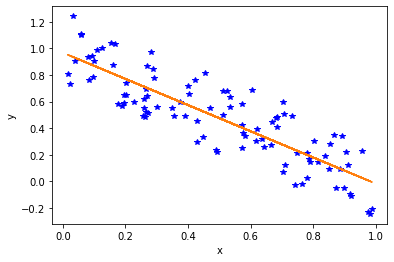

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'b*');
plt.plot(x,reta,'tab:orange');
plt.xlabel('x');
plt.ylabel('y');




### 5)  
Melhore o plot gerado na pergunta 4 incorporando uma legenda e uma anotação na  linha encontrada, como na figura abaixo:

![IMAGEM](annotation.png)

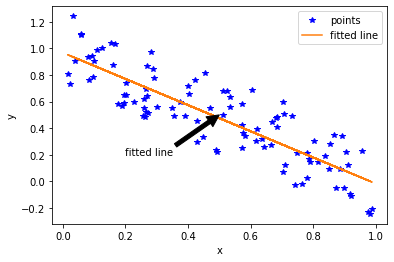

In [19]:

plt.plot(x,y,'b*',label = 'points');
plt.plot(x,reta,'tab:orange',label = 'fitted line');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();
plt.annotate('fitted line', xy=(0.5, 0.5), xytext=(0.2,0.2),
             arrowprops=dict(facecolor='k'));

## <span style="color:blue">Pandas - Parte II</span>
---

Os exercícios abaixo fazem uso dos arquivos: 

- countries_info.csv
- gdp_per_capita_ppp.csv

###  1)  
Leia o arquivo "gdp\_per\_capita\_ppp.csv" como um DataFrame com as linhas indexadas por ano e as colunas pelo nome dos países. Imprima os primeiros 10 anos (linhas) e os primeiros 5 países (colunas).<br>
__Dica:__ Use os operadores _transpose_ e _iloc_.

In [29]:
import pandas as pd
import numpy as np

# Solução
from google.colab import files

uploaded = files.upload()


Saving gdp_per_capita_ppp (3).csv to gdp_per_capita_ppp (3).csv


In [30]:
data = pd.read_csv('gdp_per_capita_ppp (3).csv', index_col = 0)
df = data.T
df.iloc[0:10,0:5]

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria
1800,NaN,472.0535,NaN,601.215222,766.253664
1801,NaN,NaN,NaN,NaN,NaN
1802,NaN,NaN,NaN,NaN,NaN
1803,NaN,NaN,NaN,NaN,NaN
1804,NaN,NaN,NaN,NaN,NaN
1805,NaN,NaN,NaN,NaN,NaN
1806,NaN,NaN,NaN,NaN,NaN
1807,NaN,NaN,NaN,NaN,NaN
1808,NaN,NaN,NaN,NaN,NaN
1809,NaN,NaN,NaN,NaN,NaN


###  2)  
Ainda considerando "gdp_per_capita_ppp.csv", plote a curva "year" $\times$ "GDP" para os três países com o maior GDP ao longo dos anos. 

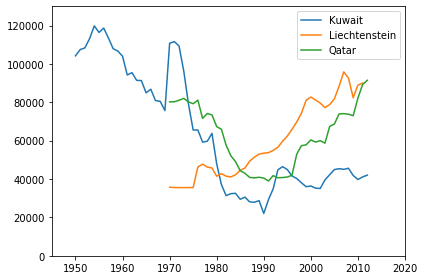

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
df.max()
# Ordenando a lista do maior para o menor GDP
df.max().sort_values(ascending = False)
# Buscando os três primeiros países da lista
lista_paises = df.max().sort_values(ascending = False)[0:3].index.values

# Gráfico
x = df.index.values.astype(int)

for pais in lista_paises:
    y = df[pais]
    plt.plot(x, y, label = pais)
    
plt.xlim([1945,2020])
plt.ylim([0,130000])
plt.legend()
plt.tight_layout() 

### 3)  
Ainda considerando "gdp_per_capita_ppp.csv", imprima o nome de todos os países (se algum) que contêm exatamente um valor faltando para o seu GDP (isto é, um NaN). Plote o GDP desses países.

In [32]:
# solução 
nulos = df.isna( ).sum()==1
print(nulos)
print(nulos[nulos==True])

GDP per capita
Abkhazia                 False
Afghanistan              False
Akrotiri and Dhekelia    False
Albania                  False
Algeria                  False
                         ...  
Yemen, Rep.              False
Yugoslavia               False
Zambia                   False
Zimbabwe                 False
Åland                    False
Length: 260, dtype: bool
Series([], dtype: bool)


###  4)  
Crie um DataFrame com apenas 1 coluna e indexado por nome dos países, representando o GDP médio de cada país. Considere um valor faltante como sendo 0 na hora de calcular a média.

In [33]:
# solução 
df_medio = pd.DataFrame(df.fillna(value = 0).mean())
df_medio.rename(columns={0: 'GDP médio'}, inplace = True)
df_medio.index.name='País'
df_medio

,GDP médio
País,
Abkhazia,0.000000
Afghanistan,253.178379
Akrotiri and Dhekelia,0.000000
Albania,1070.687629
Algeria,1376.309984
...,...
"Yemen, Rep.",478.000456
Yugoslavia,0.000000
Zambia,409.073931


### 5)  
Leia o arquivo "countries.csv" contendo "Life expectancy", "Population" e "Average GDP" para cada país. Ordene o DataFrame em ordem decrescente considerando a coluna "Average GDP" e faça um _scatter plot_ de "Population" $\times$ "Life expectancy" para os 100 primeiro países. Aplique a função logaritmíca à coluna "Population" antes de gerar o plot. Normalize a coluna "Average GDP" e pondere o tamanho dos pontos de acordo com o "Average GDP" normalizado (isto é, o tamanho do ponto deve ser proporcional ao GDB). Seu plot deve ser parecido com o apresentado abaixo:
![IMAGEM](dfscatter.png)

In [35]:
import pandas as pd
import numpy as np

# Solução
from google.colab import files

uploaded = files.upload()


Saving countries_info (1).csv to countries_info (1).csv


In [0]:
df = pd.read_csv('countries_info (1).csv')
df.head()

df_decrescente = df.sort_values(by = 'Average GDP', ascending = False)

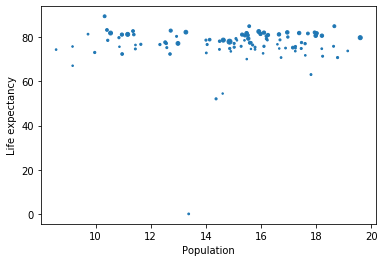

In [38]:
x = np.log(df_decrescente['Population'][0:100])
y = df_decrescente['Life expectancy'][0:100]
z = df_decrescente['Average GDP']/df['Average GDP'].max()
   
plt.scatter(x, y, s=25*z)
plt.xlabel('Population')
plt.ylabel('Life expectancy')
plt.show()

**faça upload de um notebook com a solução da questão 3 de Numpy e a 4 do Pandas - (pode fazer upload de todo homework se quiser) no google drive no diretório:**

https://drive.google.com/open?id=1rG9O73RBHEfU0PjSO-ksSK6Fap00v_iX

O nome do notebook deve ser:

seuprimeironome-seuultimonome-modulo4.ipynb

Por exemplo: gustavo-nonato-modulo4.ipynb
